In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

iris=pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [2]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [3]:
iris['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

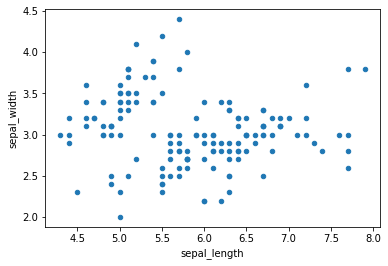

In [4]:
iris.plot(kind="scatter",x="sepal_length",y="sepal_width")
plt.show()

/home/yash/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


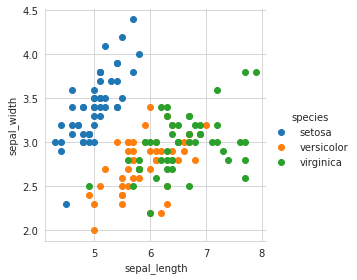

In [12]:
sns.set_style("whitegrid");
sns.FacetGrid(iris,hue="species",size=4).map(plt.scatter,"sepal_length","sepal_width").add_legend();
plt.show()

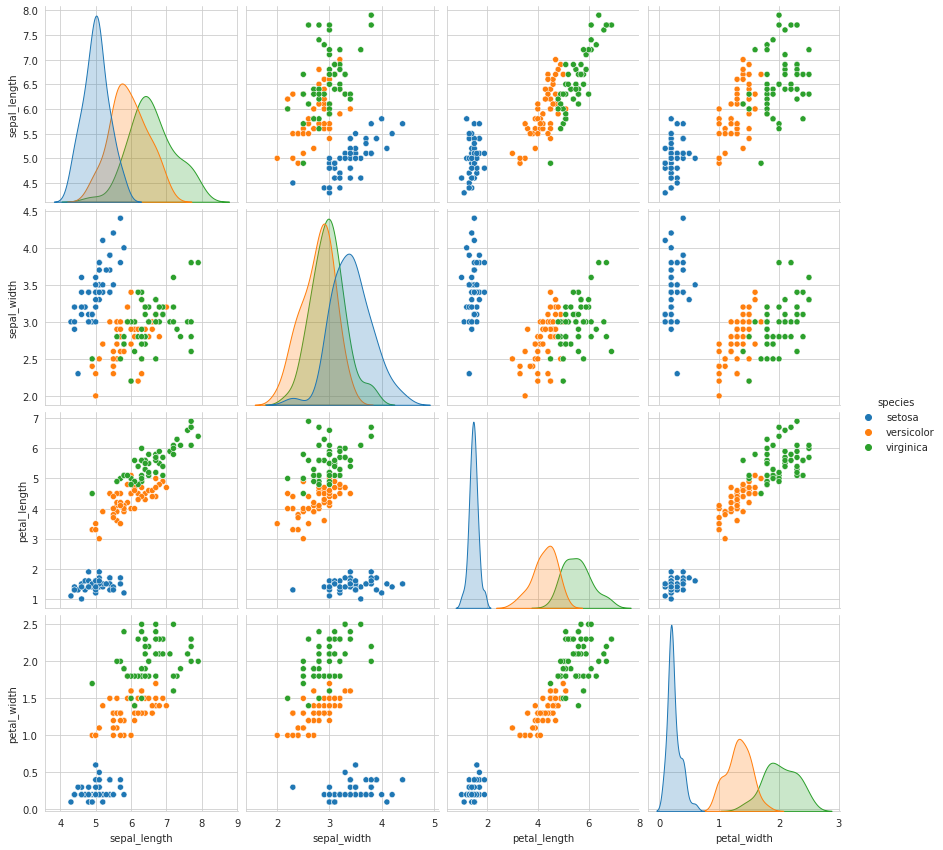

In [9]:
sns.set_style("whitegrid");
sns.pairplot(iris,hue="species",height=3);
plt.show()

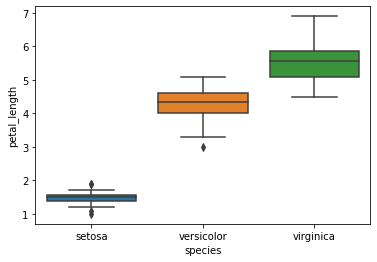

In [4]:
sns.boxplot(x='species',y='petal_length',data=iris)
plt.show()

In [9]:
data=pd.read_csv("haberman.csv",names=["age","year","nodes","status"])
data

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [10]:
df=pd.DataFrame(data)
df


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [11]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [12]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [15]:
df.isna().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

In [16]:
data.nunique()

age       49
year      12
nodes     31
status     2
dtype: int64

In [17]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [24]:
features=df.columns[:-1]
target=df.columns[-1]

status


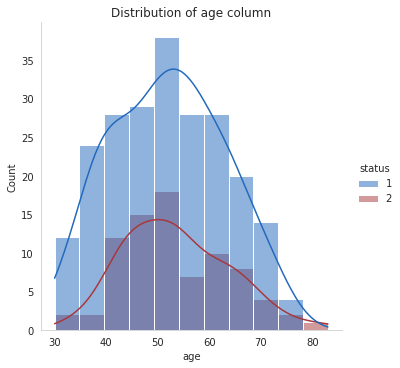

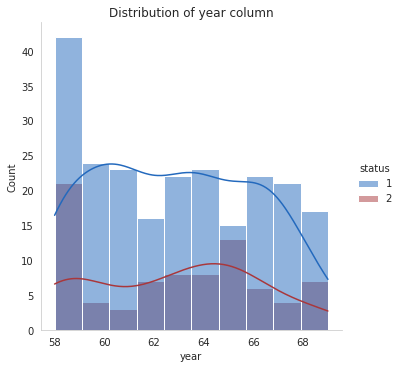

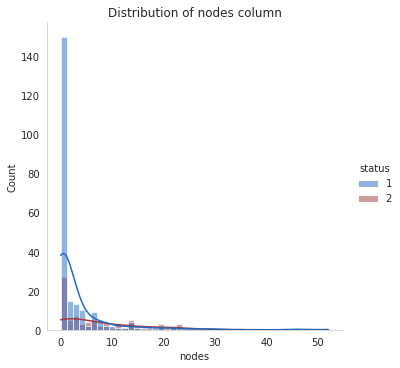

In [27]:
for feature in features:
    sns.set_style("whitegrid")
    sns.displot(data=data,x=feature,hue=target,kde=True,palette='vlag')
    plt.title(f'Distribution of {feature} column')
    plt.grid()
    plt.show()



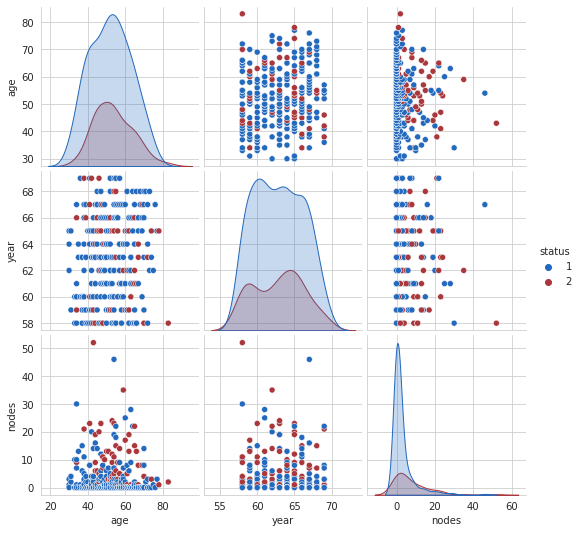

In [29]:
sns.pairplot(data=data,hue='status',palette='vlag')
plt.show()

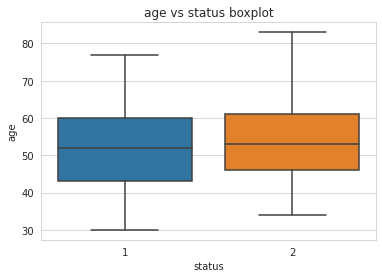

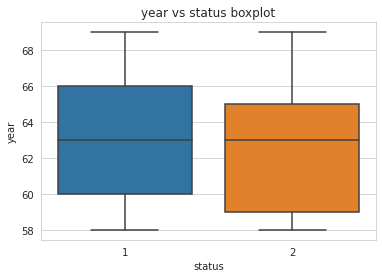

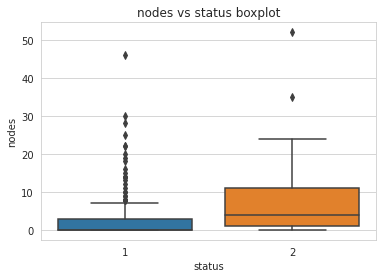

In [32]:
for feature in features:
    sns.boxplot(x=target,y=feature,data=data)
    plot_title=feature+' vs '+target+' boxplot' 
    plt.title(plot_title)
    plt.show()

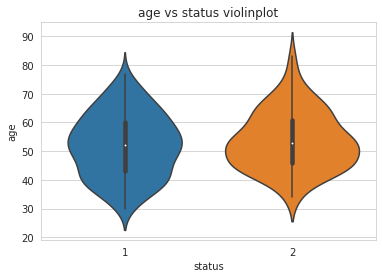

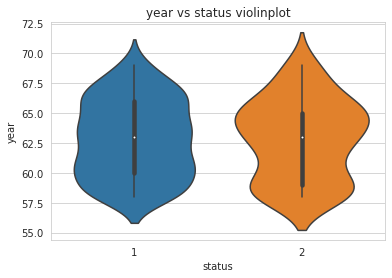

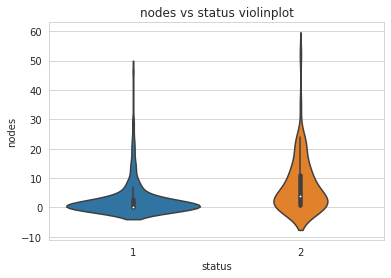

In [33]:
for feature in features:
    sns.violinplot(x=target,y=feature,data=data)
    plot_title=feature+' vs '+target+' violinplot'
    plt.title(plot_title)
    plt.show()

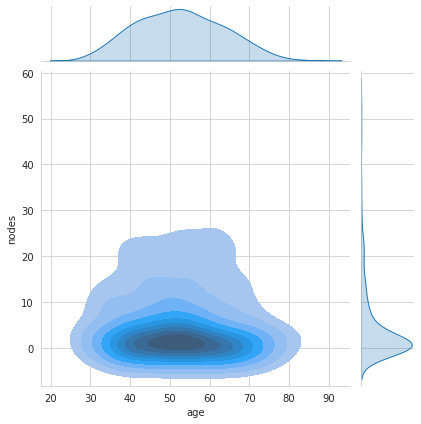

In [34]:
sns.jointplot(x="age",y="nodes",data=data,kind="kde",fill=True)
plt.show()

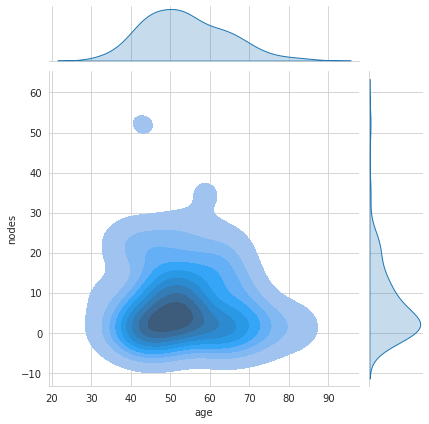

In [35]:
sns.jointplot(x="age",y="nodes",data=data[data.status==2],kind="kde",fill=True)
plt.show()

In [41]:
for feature in ["age","nodes"]:
    print(f"Quantile of {feature}: ")
    min_f=data[feature].min()
    print(f"Min : {min_f}")
    quantiles=[1,25,50,75,99]
    q=np.percentile(data[feature],quantiles)
    for i,qx in enumerate(q):
        print(f"{quantiles[i]} percentile :{qx}")
    iqr=q[3]-q[1]
    max_f=data[feature].max()
    print(f"Max :{max_f}")
    print(f"IQR ({feature}) = {iqr}")
    print()

Quantile of age: 
Min : 30
1 percentile :31.0
25 percentile :44.0
50 percentile :52.0
75 percentile :60.75
99 percentile :75.94999999999999
Max :83
IQR (age) = 16.75

Quantile of nodes: 
Min : 0
1 percentile :0.0
25 percentile :0.0
50 percentile :1.0
75 percentile :4.0
99 percentile :29.899999999999977
Max :52
IQR (nodes) = 4.0

